In [1]:
# pyplot_annotation.jl
#
#	Demonstrate plot annotations
#
# gizmaa (https://gist.github.com/gizmaa/7214002)
# Julia 1.1.0
# Last Edit: 10.05.19

using PyPlot
using Dates
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

######################################
#  Generate an hour of data at 10Hz  #
######################################
x = collect(DateTime(2013,10,4):Dates.Millisecond(100):DateTime(2013,10,4,1)) # Generate time array
x = Dates.value.(x)/1000/60/60/24 # Convert time from milliseconds from day 0 to days from day 0
y = sin.(2*pi*collect(0:2*pi/(length(x)+1):2*pi-(2*pi/length(x))))
dx = maximum(x) - minimum(x)
dy = maximum(y) - minimum(y)

y2 = 30.0*(1.0 .+ sin.(2.0*pi*collect(pi:2.0*pi/length(x):3*pi-(2*pi/length(x))))) .- 10.0
x2 = collect(minimum(x):dx/20:maximum(x))
y2 = 10rand(21) .- 3
x3 = collect(minimum(x):dx/20:maximum(x))
y3 = 10rand(21) .- 3;

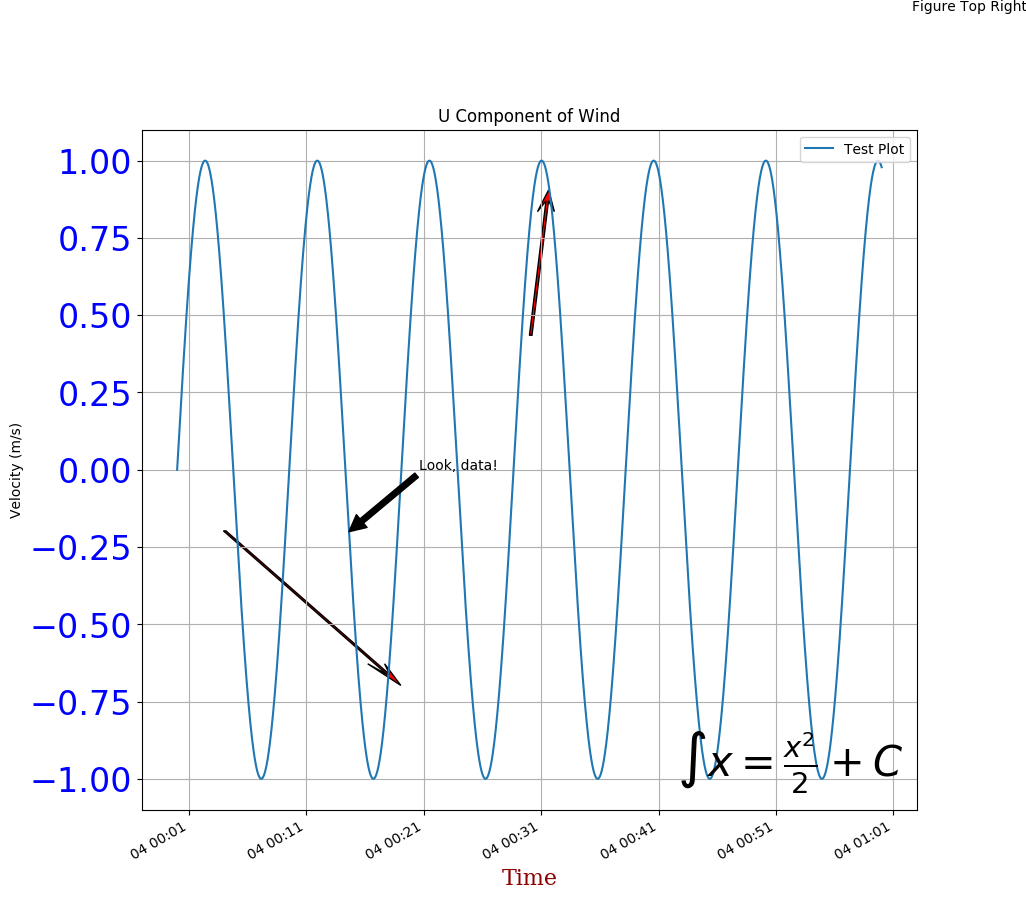

In [2]:
##########
#  Plot  #
##########
fig = figure("pyplot_annotation",figsize=(10,10)) # Create a figure and save its handle
#ax = axes([0.12;0.2;0.75;0.7])
ax = gca()
p = plot_date(x,y,linestyle="-",marker="None",label="Test Plot") # Plot a basic line
axis("tight") # Fit the axis tightly to the plot
PyPlot.title("U Component of Wind")
grid("on")
legend(loc="upper right",fancybox="true") # Create a legend of all the existing plots using their labels as names

##################
#  Text Styling  #
##################
font1 = Dict("family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>16)
xlabel("Time",fontdict=font1)
ylabel("Velocity (m/s)")
setp(ax.get_yticklabels(),fontsize=24,color="blue") # Y Axis font formatting

#################
#  Arrow Tests  #
#################
# This arrows orient toward the x-axis, the more horizontal they are the more skewed they look
arrow(x[convert(Int64,floor(length(x)/2))],
	0.4,
	0.0009,
	0.4,
	head_width=0.001,
	width=0.00015,
	head_length=0.07,
	overhang=0.5,
	head_starts_at_zero="true",
	facecolor="red")
arrow(x[convert(Int64,floor(0.3length(x)))]-0.25dx,
	y[convert(Int64,floor(0.3length(y)))]+0.25dy,
	0.25dx,
	-0.25dy,
	head_width=0.001,
	width=0.00015,
	head_length=0.07,
	overhang=0.5,
	head_starts_at_zero="true",
	facecolor="red",
	length_includes_head="true")

###########################
#  Text Annotation Tests  #
###########################
annotate("Look, data!",
	xy=[x[convert(Int64,floor(length(x)/4.1))];y[convert(Int64,floor(length(y)/4.1))]],
	xytext=[x[convert(Int64,floor(length(x)/4.1))]+0.1dx;y[convert(Int64,floor(length(y)/4.1))]+0.1dy],
	xycoords="data",
	arrowprops=Dict("facecolor"=>"black")) # Julia dictionary objects are automatically converted to Python object when they pass into a PyPlot function
annotate("Figure Top Right",
	xy=[1;1],
	xycoords="figure fraction",
	xytext=[0,0],
	textcoords="offset points",
	ha="right",
	va="top")
annotate(L"$\int x = \frac{x^2}{2} + C$",
	xy=[1;0],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=30.0,
	ha="right",
	va="bottom")

fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
fig.canvas.draw() # Update the figure
gcf() # Needed for IJulia to plot inline